# Single-Degree-of-Freedom (SDoF) System Response Code

This Python code calculates and visualizes the response of a Single-Degree-of-Freedom (SDoF) mechanical system subjected to harmonic loading using the Duhamel integration method. The SDoF system represents a simplified model for studying the dynamics of various mechanical systems, including structures, machines, and more.

## Key Components and Parameters

1. **System Parameters**:
   - `m`: Mass of the SDoF system (kg).
   - `xi`: Damping ratio.
   - `f`: Frequency of excitation (Hz).
   
2. **Time Parameters**:
   - `tMax`: Maximum simulation time (s).
   - `delT`: Time step for numerical integration (s).

3. **Excitation Force**:
   - `f_force`: Frequency of the applied harmonic force (Hz).
   - `P`: Amplitude of the force (N).

## Duhamel Integration Method

The code employs the Duhamel integration method to numerically compute the system's displacement response over time. This method accounts for the system's mass, damping, and the applied harmonic force. It calculates the displacement response for each time step using cumulative integration of the force history.

## Visualizing the Response

The code generates a plot that shows the displacement response of the SDoF system as a function of time. The x-axis represents time (s), and the y-axis represents displacement (m).

## Usage

To use this code, you can adjust the system parameters and time parameters as needed for your specific problem. After running the code, the plot will display the system's response.

Please note that this code provides a simplified model for educational and basic analysis purposes. For complex mechanical systems, additional considerations and refinements may be necessary.


In [7]:
# import the necessary libraries

import math
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [8]:
# Define system parameters
m = 1000          # Mass (kg)
xi = 0.05         # Damping ratio
f = 1.5           # Frequency of excitation (Hz)
wn = 2 * math.pi * f # angular natural frequency
wd = wn * math.sqrt(1 - xi**2)  # Damped natural frequency

In [9]:
# Time parameters
tMax = 20          # Maximum time (s)
delT = 0.01        # Time step (s)
time = np.arange(0, tMax + delT, delT)  # Time vector

# Define excitation force
f_force = 1       # Frequency of the force (Hz)
wf = 2 * math.pi * f_force
P = 100            # Force amplitude (N)
force = P * np.sin(wf * time)  # Force vector

\begin{equation}
u(t) = A e^{-\xi \omega_n t} \sin (\omega_d t) - B e^{-\xi \omega_n t} \cos (\omega_d t)
\end{equation}

Where,

\begin{equation}
A = \frac{1}{m\omega_d} \int_0^t e^{\xi \omega_n \tau} f(\tau)\cos(\omega_d\tau)\mathrm{d}\tau
\end{equation}

\begin{equation}
B = \frac{1}{m\omega_d} \int_0^t e^{\xi \omega_n \tau} f(\tau)\sin(\omega_d\tau)\mathrm{d}\tau
\end{equation}

In [10]:
# Define the Duhamel integration function
def Duhamel(T, F):
    # Initialize an array to store displacement values
    U = np.zeros(len(T))
    
    # Initialize variables for cumulative sums used to calculate A and B
    ACum_i = 0
    BCum_i = 0
    
    # Loop through the time vector to compute the response at each time point
    for i, t in enumerate(T):
        
        if i > 0:
            # Calculate A[i]
            y_i = math.e**(xi * wn * T[i]) * F[i] * math.cos(wd * T[i])  # Value of integrand at current time-step
            y_iml = math.e**(xi * wn * T[i-1]) * F[i-1] * math.cos(wd * T[i-1])  # Value of integrand at previous time-step
            Area_i = 0.5 * delT * (y_i + y_iml)  # Area of the trapezoid
            ACum_i += Area_i  # Cumulative areas from t=0 to the current time
            A_i = (1 / (m * wd)) * ACum_i  # Value of A for the current time-step
            
            # Calculate B[i]
            y_i = math.e**(xi * wn * T[i]) * F[i] * math.sin(wd * T[i])  # Value of integrand at current time-step
            y_iml = math.e**(xi * wn * T[i-1]) * F[i-1] * math.sin(wd * T[i-1])  # Value of integrand at previous time-step
            Area_i = 0.5 * delT * (y_i + y_iml)  # Area of the trapezoid
            BCum_i += Area_i  # Cumulative areas from t=0 to the current time
            B_i = (1 / (m * wd)) * BCum_i  # Value of B for the current time-step
            
            # Calculate the response
            U[i] = A_i * math.e**(-xi * wn * T[i]) * math.sin(wd * T[i]) - B_i * math.e**(-xi * wn * T[i]) * math.cos(wd * T[i])
            
    return U


In [11]:
# Compute the system response using Duhamel integration
response = Duhamel(T=time, F=force)

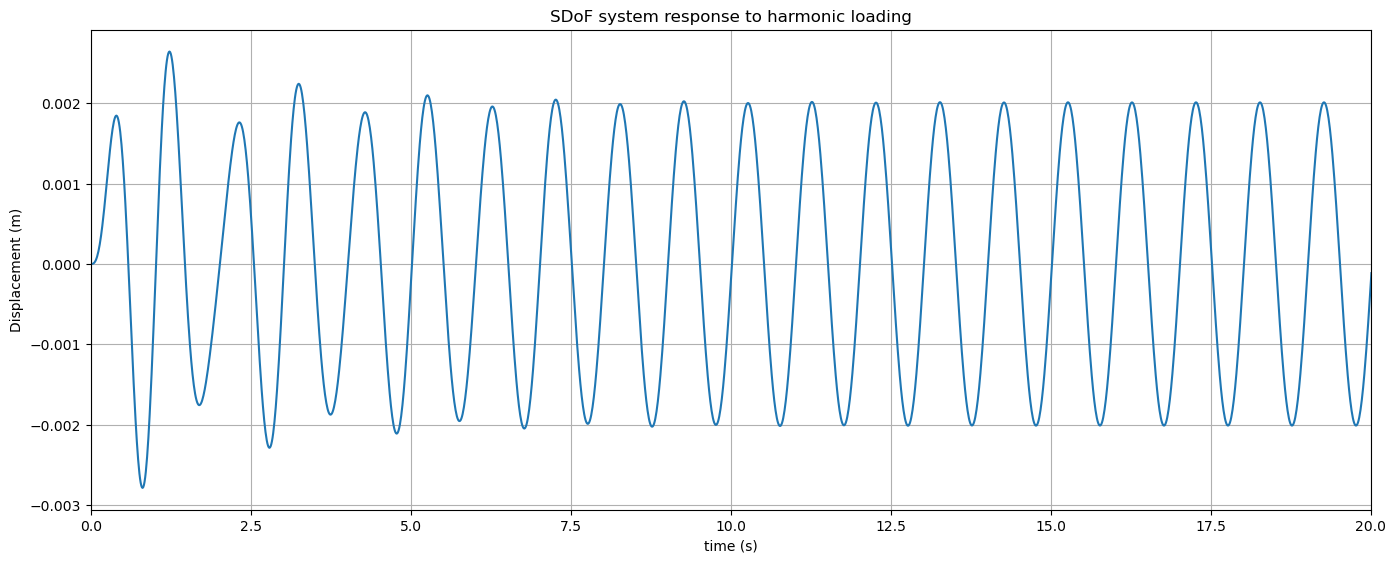

In [12]:

# Create a plot to visualize the system response
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2, 1])
axes.plot(time, response)

# Configure plot labels and title
axes.set_xlabel('time (s)')
axes.set_ylabel('Displacement (m)')
axes.set_title('SDoF system response to harmonic loading')
axes.set_xlim([0, tMax])

# Add grid lines to the plot
plt.grid()

# Display the plot
plt.show()